# Galerkin methods

Galerkin methods are seriously fucked up because each and every specific set of boundary conditions gives us an individual set of equations to solve it with. But at least it is a true diadiagnoal matrix now.

---
If our PDF is 
    $$ -p \cdot u''(x) + q(x) \cdot u(x) = 0, \; x \in (0, 2)$$
and boundary conditions $u(0) = a$ and $u(L) = b$, then  the leftside boundary values are
$$  \begin{split} 
    A(1,1) &= \frac{2 \cdot p}{h} + h \cdot q(x_2), \\
    A(1,2) &= -\frac{p}{h}, \\
    y(1) &= h \cdot f(x_2) + \frac{a}{h}.
    \end{split}$$
For main diagonal elements:
$$  \begin{split} 
    A(i,i) &= \frac{2 \cdot p}{h} + h \cdot q(x_i+1), \\
    A(i,i+1) &= -\frac{p}{h} = A(i,i-1), \\
    y(i) &= h \cdot f(x_{i+1}),
    \end{split}$$
where $i = 2, ..., n-2$. 

For last elements 
$$  \begin{split} 
    A(n-1,n-1) &= \frac{2 \cdot p}{h} + h \cdot q(x_n), \\
    A(n-1,n-2) &= -\frac{p}{h}, \\
    y(n-1) &= h \cdot f(x_n) + \frac{b}{h}.
    \end{split}$$   

In [111]:
import numpy as np
import matplotlib.pyplot as plt

## 2nd order ODE using Gelrkin method for Dirichlet boundary conditions

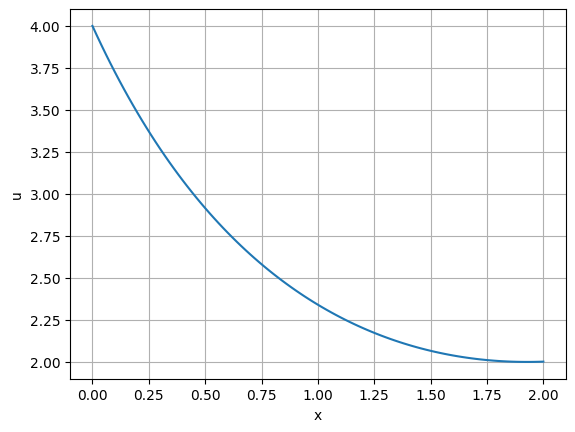

In [112]:
"""
Solve
-u''(x) + 1/(x + 1)*u(x) = 0 , x ∈ (0, 2) ,
u(0) = 4, u(2) = 2,
by means of the Galerkin finite element method with shape functions
φ_i(x) = (x - x_{i-1})/h for x ∈ [x_{i-1}, x_i]
φ_i(x) = (x_{i+1} - x)/h for x ∈ [x_i, x_{i+1}] 
φ_i(x) = 0 elsewhere,
where i = 0, ..., n; n = 50, h = 2/n.
"""
a = 4.0
b = 2.0
n = 100
h = 2.0/n
p = 1.0
q = lambda x: 1.0/(x + 1)
x = np.linspace(0, 2, n+1)
A = np.zeros((n-1, n-1))
y = np.zeros(n-1)
A[0, 0] = 2.0*p/h + h*q(x[1])
A[0, 1] = -p/h
y[0] = a/h
for i in range(1, n-2):
    A[i, i-1] = -p/h
    A[i, i]   =  2.0*p/h + h*q(x[i+1])
    A[i, i+1] = -p/h
    y[i] = 0.0
A[n-2, n-2] = 2.0*p/h + h*q(x[n-1])
A[n-2, n-3] = -p/h
y[n-2] = b/h

u = np.linalg.solve(A, y)
plt.plot(x, np.concatenate([[4], u, [2]]))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()

In [113]:
print("The upper left corner elements of matrix A:")
n = len(A)
for i in range(5):
    for j in range(5):
        print(f"{A[i][j]:.10f}", end='\t')
    print()
print("\n")    
print("The lower right corner elements of matrix A:")
n = len(A)
for i in range(n-5, n):
    for j in np.arange(n-5, n):
        print(f"{A[i][j]:.10f}", end='\t')
    print()

The upper left corner elements of matrix A:
100.0196078431	-50.0000000000	0.0000000000	0.0000000000	0.0000000000	
-50.0000000000	100.0192307692	-50.0000000000	0.0000000000	0.0000000000	
0.0000000000	-50.0000000000	100.0188679245	-50.0000000000	0.0000000000	
0.0000000000	0.0000000000	-50.0000000000	100.0185185185	-50.0000000000	
0.0000000000	0.0000000000	0.0000000000	-50.0000000000	100.0181818182	


The lower right corner elements of matrix A:
100.0068965517	-50.0000000000	0.0000000000	0.0000000000	0.0000000000	
-50.0000000000	100.0068493151	-50.0000000000	0.0000000000	0.0000000000	
0.0000000000	-50.0000000000	100.0068027211	-50.0000000000	0.0000000000	
0.0000000000	0.0000000000	-50.0000000000	100.0067567568	-50.0000000000	
0.0000000000	0.0000000000	0.0000000000	-50.0000000000	100.0067114094	


## 2nd order ODE using Gelrkin method for Neumann boundary conditions

If our PDF is 
    $$ -p \cdot u''(x) + q(x) \cdot u(x) = 0, \; x \in (0, 2)$$

with boundary conditions $u'(0) = a$ and $u'(L) = b$ then leftside boundary values are
$$  \begin{split} 
    A(1,1) &= \frac{p}{h} + h \cdot q(x_1), \\
    A(1,2) &= -\frac{p}{h}, \\
    y(1) &=  \frac{h}{2} \cdot f(x_1) - p.
    \end{split}$$
For main diagonal elements:
$$  \begin{split} 
    A(i,i) &= \frac{2 \cdot p}{h} + h \cdot q(x_i), \\
    A(i,i+1) &= -\frac{p}{h} = A(i,i-1), \\
    y(i) &=  h \cdot f(x_i),
    \end{split}$$
where $i = 2, ..., n$. 

For last elements 
$$  \begin{split} 
    A(n+1,n+1) &= \frac{p}{h} + h \cdot q(x_{n+1}), \\
    A(n+1,n) &= -\frac{p}{h}, \\
    y(n+1) &= \frac{h}{2} \cdot f(x_i) - p.
    \end{split}$$  

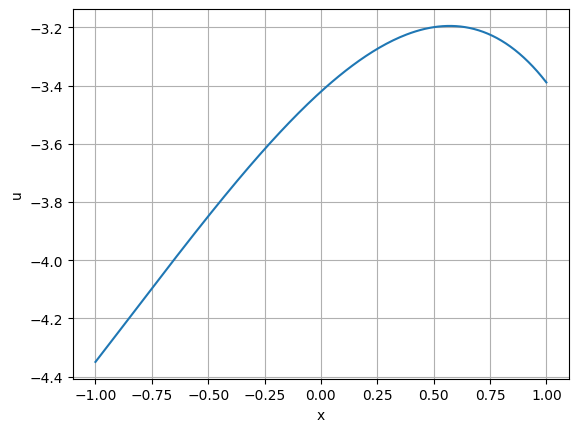

In [114]:
"""
Solve
    -3u''(x) + exp(x) u(x) = x - 1 , x ∈ (-1, 1) ,
    u'(-1) = 1, u'(1) = -1,
by means of the Galerkin finite element method
φ_i(x) = (x - x_{i-1})/h for x ∈ [x_{i-1}, x_i]
φ_i(x) = (x_{i+1} - x)/h for x ∈ [x_i, x_{i+1}] 
φ_i(x) = 0 elsewhere,
where i = 0, ..., n, n = 200, h = 2/n.
"""
a =  1.0
b = -1.0
n = 200
h = 2.0/n
p = 3.0
q = lambda x: np.exp(x)
f = lambda x: x-1
x = np.linspace(-1, 1, n+1)
A = np.zeros((n+1, n+1))
y = np.zeros(n+1)
A[0, 0] = p/h + h/2*q(x[0])
A[0, 1] = -p/h
y[0] = h/2.0 * f(x[0]) - p
for i in range(1, n):
    A[i, i-1] = -p/h
    A[i, i]   =  2.0*p/h + h*q(x[i])
    A[i, i+1] = -p/h
    y[i] = h * f(x[i])
A[n, n] = p/h + h/2*q(x[n])
A[n, n-1] = -p/h
y[n] = h/2.0 * f(x[n]) - p

u = np.linalg.solve(A, y)
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()

In [115]:
print("The upper left corner elements of matrix A:")
n = len(A)
for i in range(5):
    for j in range(5):
        print(f"{A[i][j]:.10f}", end='\t')
    print()
print("\n")    
print("The lower right corner elements of matrix A:")
n = len(A)
for i in range(n-5, n):
    for j in np.arange(n-5, n):
        print(f"{A[i][j]:.10f}", end='\t')
    print()

The upper left corner elements of matrix A:
300.0018393972	-300.0000000000	0.0000000000	0.0000000000	0.0000000000	
-300.0000000000	600.0037157669	-300.0000000000	0.0000000000	0.0000000000	
0.0000000000	-300.0000000000	600.0037531110	-300.0000000000	0.0000000000	
0.0000000000	0.0000000000	-300.0000000000	600.0037908304	-300.0000000000	
0.0000000000	0.0000000000	0.0000000000	-300.0000000000	600.0038289289	


The lower right corner elements of matrix A:
600.0261169647	-300.0000000000	0.0000000000	0.0000000000	0.0000000000	
-300.0000000000	600.0263794446	-300.0000000000	0.0000000000	0.0000000000	
0.0000000000	-300.0000000000	600.0266445624	-300.0000000000	0.0000000000	
0.0000000000	0.0000000000	-300.0000000000	600.0269123447	-300.0000000000	
0.0000000000	0.0000000000	0.0000000000	-300.0000000000	300.0135914091	


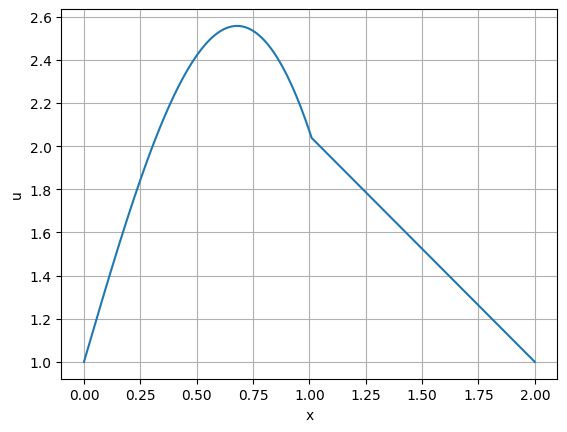

In [116]:
""" 
Solve
-(pu')'(x) = 10x(2 - x) , x ∈ (0, 2) ,
u(0) = u(2) = 1,
p(x) = 1 if x ∈ (0, 1)
p(x) = 3 if x ∈ (1, 2) 
by means of the Galerkin finite element method
φ_i(x) = (x - x_{i-1})/h for x ∈ [x_{i-1}, x_i]
φ_i(x) = (x_{i+1} - x)/h for x ∈ [x_i, x_{i+1}] 
φ_i(x) = 0 elsewhere,
where i = 0, . . . , n, n = 200, h = 2/n 
"""
n = 200
h = 2/n
x = np.linspace(0, 2, n+1)
f = lambda x: 10*x*(2-x)

A = np.zeros((n-1, n-1))
A[0,0] = 2/h
A[0,1] = -1/h
y = np.zeros(n-1)
y[0] = h*f(x[1])+1/h
for i in range(1, int(n/2)):
    A[i,i-1] = -1/h
    A[i,i]   =  2/h
    A[i,i+1] = -1/h
    y[i]     = h*f(x[i+1])
A[int(n/2),int(n/2-1)]  = -1/h
A[int(n/2),int(n/2)] = 4/h
A[int(n/2),int(n/2+1)] = -3/h
y[int(n/2)]     = h*f(x[n])
for i in range(int(n/2+1), n-2):
    A[i,i-1] = -3/h
    A[i,i]   = 6/h
    A[i,i+1] = -3/h
    y[i]     = h*f(x[n])
A[n-2,n-3] = -3/h
A[n-2,n-2] = 6/h
y[n-2] = h*f(x[n])+3/h

u = np.linalg.solve(A, y)
u = np.insert(u, 0, 1)
u = np.append(u, 1)

plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()


In [124]:
print("The middle intesection elements of matrix A:")
n = len(A)
for i in range(int(n/2-1), int(n/2+4)):
    for j in range(int(n/2-1), int(n/2+4)):
        print( f"{A[i][j]:.10f}", end='\t')
    print()


The middle intesection elements of matrix A:
200.0000000000	-100.0000000000	0.0000000000	0.0000000000	0.0000000000	
-100.0000000000	200.0000000000	-100.0000000000	0.0000000000	0.0000000000	
0.0000000000	-100.0000000000	400.0000000000	-300.0000000000	0.0000000000	
0.0000000000	0.0000000000	-300.0000000000	600.0000000000	-300.0000000000	
0.0000000000	0.0000000000	0.0000000000	-300.0000000000	600.0000000000	


In [1]:
import scipy
import sympy as sym

def convergence_rate_analysis(series_type, func):
    N_values = [2, 4, 8, 16]
    norms = []
    cpu_times = []
    for N in N_values:
        psi = series(series_type, N)    
        t0 = time.clock()
        u, c = least_squares_non_verbose(
            gauss_bell, psi, Omega, False)
        t1 = time.clock()
        error2 = sym.lambdify([x], (func - u)**2)
        L2_norm = scipy.integrate.quad(error2, Omega[0], Omega[1])
        L2_norm = scipy.sqrt(L2_norm)
        norms.append(L2_norm[0])
        cpu_times.append(t1-t0)
    return N_values, norms, cpu_times

Omega = [0, 1]
x = sym.Symbol("x")
gaussian_bell = sym.exp(-(x-0.5)**2) - sym.exp(-0.5**2)
step = sym.Piecewise((1, 0.25 < x), (0, True)) - \
        sym.Piecewise((1, 0.75 < x), (0, True))
func = gaussian_bell

import pylab as plt
series_types = ["Taylor", "Sinusoidal", "Bernstein", "Lagrange"]
for series_type in series_types:
    N_values, norms, cpu_times = \
            convergence_rate_analysis(series_type, func)
    plt.loglog(N_values, norms)
plt.show()  

def Lagrange_series(N):
    psi = []
    h = 1.0/N
    points = [i*h for i in range(N+1)]
    for i in range(len(points)):
        p = 1
        for k in range(len(points)):
            if k != i:
                p *= (x - points[k])/(points[i] - points[k])
        psi.append(p)
    return psi

def Bernstein_series(N):
    psi = []
    for k in range(0,N+1):
        psi_k = sym.binomial(N, k)*x**k*(1-x)**(N-k)
        psi.append(psi_k)
    return psi
    
def Sinusoidal_series(N):
    psi = []
    for k in range(1,N):
        psi_k = sym.sin(sym.pi*k*x)
        psi.append(psi_k)
    return psi

def Taylor_series(N):
    psi = []
    for k in range(1,N):
        psi_k = x**k
        psi.append(psi_k)
    return psi

def series(series_type, N):
    if series_type== "Taylor" : return Taylor_series(N)
    elif series_type== "Sinusoidal" : return Sinusoidal_series(N)
    elif series_type== "Bernstein" : return Bernstein_series(N)
    elif series_type== "Lagrange" : return Lagrange_series(N)
    else: print("series type unknown ")

NameError: name 'series' is not defined